In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report


In [2]:
iris = datasets.load_iris()
X = iris.data[:, 0:3]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [5]:
X.shape

(150, 3)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target.shape

(150,)

In [8]:
# print the names of the four features
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# print the integers representing the species of each observation
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# print the encoding scheme for species; 0 = Setosa , 1=Versicolor, 2= virginica
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
# # vstack() function is used to stack the sequence of input arrays vertically to make a single array.
# X_combined_std = np.vstack((X_train_std, X_test_std))

# # numpy.hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.
# y_combined = np.hstack((y_train, y_test))

In [14]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [15]:
# Predict the value on test
y_pred = lr.predict(X_test_std)

In [16]:
# Check the accuarcy 
accuracy_score(y_test, y_pred)

0.9555555555555556

In [17]:
print('The number of input feature ',X_train.shape[1])
print(classification_report(y_test,y_pred))

The number of input feature  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [18]:
# lr = LogisticRegression(C=100.0, random_state=1)
# lr.fit(X_train_std, y_train)
# plot_decision_regions(X_combined_std, y_combined,clf=lr, legend=2, X_highlight=X_test_std)
# plt.xlabel('petal length [standardized]')
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# #plt.savefig('images/03_06.png', dpi=300)
# plt.show()
# lr.predict_proba(X_test_std[:3, :])
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1)
# lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
# lr.predict(X_test_std[:3, :])
# lr.predict(X_test_std[0, :].reshape(1, -1))

In [19]:
# X_train_std.shape
X_test.shape

(45, 3)

# Creating PCA component with Train Data

In [20]:
# Get the top 2 principal components
pca =  PCA(n_components=3)
train_pca = pca.fit_transform(X_train_std)

In [21]:
# Train the Logistic Regression model on transformed data 
lr_model = lr.fit(train_pca, y_train)

# Creating PCA component with Test Data

In [22]:
# Transformed the x_test data
test_pca = pca.transform(X_test_std)
# Predict the value on test
ypred_pca = lr_model.predict(test_pca)
print('The number of input feature ',X_train.shape[1])
print(classification_report(y_test,ypred_pca))

The number of input feature  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [23]:
pca.explained_variance_ratio_

array([0.67310643, 0.30563136, 0.02126221])

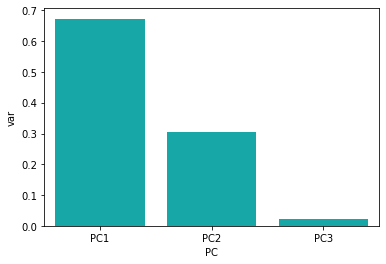

In [24]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [25]:
# Check the accuarcy 
accuracy_score(y_test, ypred_pca)

0.9555555555555556

# LDA - Dimensionality Reduction

In [26]:
# type your code here# create the lda model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [27]:
# Train the lda model
lda_model=lda_model.fit(X_train_std,y_train)
inp_lda=lda_model.transform(X_train_std)

In [28]:
# Shape of tranform data
inp_lda.shape

(105, 2)

In [29]:
# Train the model on transformed data 
lr_model = lr.fit(inp_lda, y_train)
# Transformed the x_test data
test_lda = lda_model.transform(X_test_std)
# Predict the value on test
ypred_ldr = lr_model.predict(test_lda)
# print('The number of input feature ',X_train.shape[1])
print(classification_report(y_test,ypred_ldr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
# Check the accuarcy 
accuracy_score(y_test, ypred_ldr)

0.9777777777777777